### dataset preprocessing - frequency dataset generation
input으로 받은 데이터셋을 한꺼번에 welch's method 적용하여 다음 형식으로 변환
- amplitude spectrum
- power spectrum
- PSD

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fpath = "C:/Users/User/Documents/GitHub/UGRP/data/synthetic_data/"

Contaminated = np.load(fpath + "contaminated_by_realistic" + ".npy")
Clean = np.load(fpath + "clean_data" + ".npy")

함수

In [24]:
def Welch(data, fs=2000, nperseg=512, same=True):
    from scipy.signal import welch
    from scipy.interpolate import interp1d

    results = [welch(data[i], fs, nperseg=nperseg) for i in range(len(data))]
    freqs, psd = map(np.array, zip(*results))

    # psd의 shape 확인
    original_shape = psd.shape  # (1000, 257) 같은 형태
    
    if same:
        # 기존 주파수 범위를 유지하면서 4000개의 포인트로 확장
        new_freqs = np.array([np.linspace(freqs[0][0], freqs[0][-1], data.shape[1]) for i in range(len(data))])
        upsampled_psd = np.zeros((data.shape[0], data.shape[1]))
        
        for i in range(psd.shape[0]):
            # 선형 보간법을 사용하여 upsampling
            interp_func = interp1d(freqs[0], psd[i], kind='linear')
            upsampled_psd[i] = interp_func(new_freqs[0])
        
        return new_freqs, upsampled_psd
    
    return freqs, psd

# Example usage:
fs = 2000

freqs, Contaminated_psd = Welch(Contaminated)
freqs, Clean_psd = Welch(Clean)

X = np.log10(Contaminated_psd + 1e-6)
y = np.log10(Clean_psd + 1e-6)

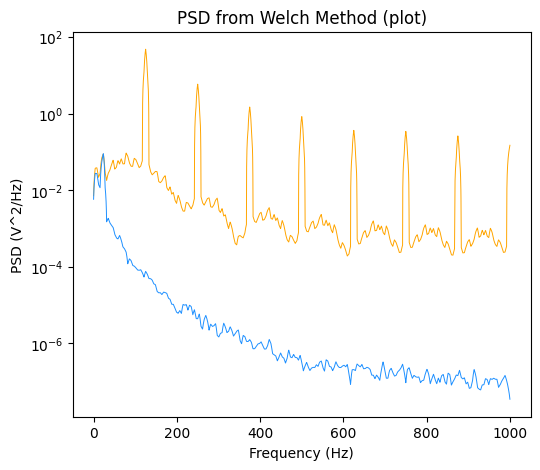

freqs.shape: (1000, 4000)
Contaminated PSD.shape: (1000, 4000)
Clean_PSD.shape: (1000, 4000)


In [25]:
plt.figure(figsize=(13, 5)) 
plt.subplot(1,2,1)
plt.semilogy(freqs[0], Contaminated_psd[0], color='orange', alpha=1, linewidth=0.7)
plt.semilogy(freqs[0], Clean_psd[0], color='dodgerblue', alpha=1, linewidth=0.7)
plt.title('PSD from Welch Method (plot)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.show()

print(f"freqs.shape: {freqs.shape}") # (257,)
print(f"Contaminated PSD.shape: {Contaminated_psd.shape}") # (1000, 257)
print(f"Clean_PSD.shape: {Clean_psd.shape}") # (1000, 257)
